### Support Vector Machines (SVM): introduction

* Les nom français pour SVM sont machines à vecteurs de support ou séparateurs à vaste marge.
* Le but de l'algorithme des SVM est de tracer des frontières de décision qui sépare au mieu des classes. Ces frontière de décison sont des hyperplan optimal.
* Les SVM s'appliquent dans le cas liéairement séparable puis se générale au cas non linéaire via des transformations que l'on appellent kernel.  
* Ces fonctions de kernel modifie l'espace des features dans le but par exemple de rendre le problème linéairement séparable.
* Les SVM s'utilise pour la classification et pour la régression

# Introduction, Meilleur hyperplan séparateur 1
Dans la figure ci-dessous, on a 2 classes linéairement séparables. Plusieurs hyperplans séparent ces 2 ensembles. Les hyperplan en pointillé sont parfois trop proche des données. L'hyperplan noire sépare au mieux les 2 classes. Effectivement, cet hyperplan est suffisement éloigné des 2 classes à la fois. 

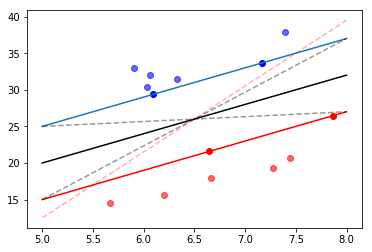

In [7]:
import matplotlib.pyplot as plt
import numpy as np
np.random.RandomState(seed=1998)
x = np.linspace(5,8,10)
y1 = 4*x+5
y2 = 4*x-5
y3 = (y1+y2)/2
np.random.seed(seed=1998)
np.random.uniform(5,8,4)
#pour un hyperplan alternatif
a1 = (y1[len(y1)-1]- y2[0])/(x[len(x)-1]-x[0])
b1 = y1[len(y1)-1]-a1*x[len(x)-1]
yalter1 = a1*x+b1
plt.plot(x,y1)
plt.plot(x,y2,color='red')
plt.plot(x,y3,color='black')
plt.plot(x,yalter1,linestyle='--',color='black',alpha=0.4)
a2 = (y2[len(y2)-1]- y1[0])/(x[len(x)-1]-x[0])
b2 = y2[len(y2)-1]-a2*x[len(x)-1]
yalter2 = a2*x+b2
plt.plot(x,yalter2,linestyle='--',color='black',alpha=0.4)
xnew1 = np.random.uniform(5,8,5)
ynew1= 4*xnew1 +5+ np.random.uniform(1,5,5)
plt.scatter(xnew1,ynew1,color='blue',alpha=0.6)
xnew1 = np.random.uniform(5,8,2)
ynew1= 4*xnew1 +5
plt.scatter(xnew1,ynew1,color='blue')


xnew2 = np.random.uniform(5,8,5)
ynew2= 4*xnew2 -5- np.random.uniform(1,5,5)
plt.scatter(xnew2,ynew2,color='red',alpha=0.6)
xnew2 = np.random.uniform(5,8,2)
ynew2= 4*xnew2 -5
plt.scatter(xnew2,ynew2,color='red')
#y3 = 7*x-15
#plt.plot(x,y3)
a = (4*7.5+5-4*5.5+5)/(7.5-5.5)
b = 4*5.5-5-a*5.5
yvalide = a*x+b
plt.plot(x,yvalide,color='red',alpha=0.3,linestyle='--')
plt.show()

### Notion intuitive de marge et de support. (2)
Dans le graphe ci-dessous, l'hyperplan qui séppare au mieux les données correspond à la droite noire. Les droites bleue et rouge sont les droites marges. Les points bleus foncé situé sur la droite bleu et les points oranges foncé situés situés sur la droite orange constituent l'ensemble des vecteurs de support noté S. La marge est la distance séparrant les 2 droites marges.

Le but des SVM est de trouver l'équation de l'hyperplan séparant au mieux les données (droite noire). Cet hyperplan est qualifié d'optimal.

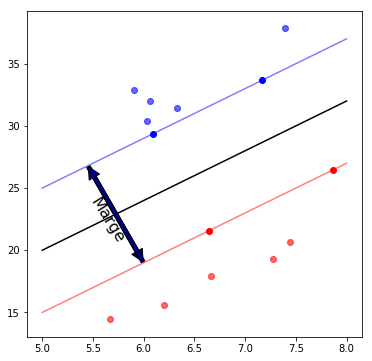

In [14]:
import matplotlib.pyplot as plt
import numpy as np
np.random.RandomState(seed=1998)
x = np.linspace(5,8,10)
y1 = 4*x+5
y2 = 4*x-5
y3 = (y1+y2)/2


#plt.axes().set_aspect('equal')
plt.figure(figsize=(6,6))

np.random.seed(seed=1998)
np.random.uniform(5,8,4)
#pour un hyperplan alternatif
a1 = (y1[len(y1)-1]- y2[0])/(x[len(x)-1]-x[0])
b1 = y1[len(y1)-1]-a1*x[len(x)-1]
yalter1 = a1*x+b1
plt.plot(x,y1,color='blue',alpha=0.5)
plt.plot(x,y2,color='red',alpha=0.5)
plt.plot(x,y3,color='black')

a2 = (y2[len(y2)-1]- y1[0])/(x[len(x)-1]-x[0])
b2 = y2[len(y2)-1]-a2*x[len(x)-1]
yalter2 = a2*x+b2

xnew1 = np.random.uniform(5,8,5)
ynew1= 4*xnew1 +5+ np.random.uniform(1,5,5)
plt.scatter(xnew1,ynew1,color='blue',alpha=0.6)
xnew1 = np.random.uniform(5,8,2)
ynew1= 4*xnew1 +5
plt.scatter(xnew1,ynew1,color='blue')


xnew2 = np.random.uniform(5,8,5)
ynew2= 4*xnew2 -5- np.random.uniform(1,5,5)
plt.scatter(xnew2,ynew2,color='red',alpha=0.6)
xnew2 = np.random.uniform(5,8,2)
ynew2= 4*xnew2 -5
plt.scatter(xnew2,ynew2,color='red')
#y3 = 7*x-15
#plt.plot(x,y3)
a = (4*7.5+5-4*5.5+5)/(7.5-5.5)
b = 4*5.5-5-a*5.5
yvalide = a*x+b

#les fleches
x0 = xnew1[0]
y0 = ynew1[0]
xc = (4*y0+x0)/17
yc = 4*xc
#plt.arrow(x0, y0, xc, yc)
#plt.scatter(x0,y0)
x00 = 6.4
#plt.scatter(x00,4*x00)
#ytrace = -x/4+y0+x0/4
#plt.plot([x0,x00],[y0,4*x00])

#plt.plot([5.45,6],[4*5.45+5,4*6-5],color='navy')



plt.annotate('',
ha = 'center', va = 'bottom',xytext = (5.45, 4*5.45+5), \
             xy = (6, 4*6-5),arrowprops = { 'facecolor' : 'navy', 'shrink' : 0.01 },alpha=0.01)

plt.annotate('',
ha = 'center', va = 'bottom',xytext = (6, 4*6-5), \
             xy = (5.45, 4*5.45+5),arrowprops = { 'facecolor' : 'navy', 'shrink' : 0.01 },alpha=0.01)

plt.text(5.45,23.5,"Marge",rotation=-58,fontsize=16)
plt.show()

Le but des SVM est de trouver l'équation d'un tel hyperplan qualifié d'optimal.

# Modélisation du problèmes : cas linéairement séparable à marge souple 3
Soit $(x^{1},y^{1}),\dots,(x^{n},y^{n})$ un ensemble d'apprentissage. $\forall i, x^{i}\in \mathcal{X}\subset \mathbb{R}^{n}$ ou $\mathcal{X}$ est l'espace contenant les features. $\forall i,y^{i}\in\{-1,1 \}$ ou $\{-1,1\}$ est l'espace des classes. On a donc 2 classes -1 ou 1.<br>
Le but est de trouver un hyperplan séparant au mieux les 2 classes. Cet hyperplan est une frontière qui sépare l'espace en 2 régions, la région de la classe -1 et la région de la classe 1.<br>
On cherche donc $f(x)=\left \langle w,x \right\rangle +b$, ou $(w,b)\in \mathbb{R}^{n+1}$ sont les paramêtres que l'on cherche à déterminer. La frontière de décision est donc de la forme $\left \langle w,x \right\rangle+b=0$. On construit le classifieur comme suit: 
$\left\{\begin{array}{ll}
h(x)=sign(\langle w,x \rangle +b) & \\
\mbox{si } h(x^{i}) =sign(\langle w,x\rangle+b)=1 & \hat{y}^{i}=1\\
\mbox{si } h(x^{i}) =sign(\langle w,x\rangle+b)=1 & \hat{y}^{i}=-1
\end{array}
\right. $<br>
L'hyperplan optimal doit maximiser la distance entre la frontière de séparation et les points de chaque classe qui lui sont le plus proche.

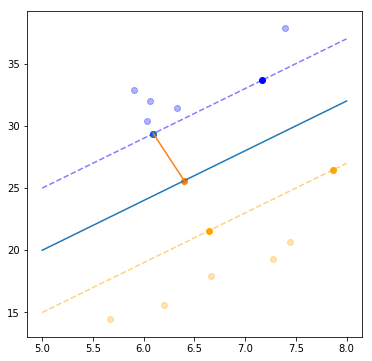

In [7]:
import matplotlib.pyplot as plt
import numpy as np
np.random.RandomState(seed=1998)
x = np.linspace(5,8,10)
y1 = 4*x+5
y2 = 4*x-5
y3 = (y1+y2)/2


#plt.axes().set_aspect('equal')
plt.figure(figsize=(6,6))

np.random.seed(seed=1998)
np.random.uniform(5,8,4)
#pour un hyperplan alternatif
a1 = (y1[len(y1)-1]- y2[0])/(x[len(x)-1]-x[0])
b1 = y1[len(y1)-1]-a1*x[len(x)-1]
yalter1 = a1*x+b1
plt.plot(x,y1,color='blue',alpha=0.5,linestyle='--')
plt.plot(x,y2,color='orange',alpha=0.5,linestyle='--')
plt.plot(x,y3)

a2 = (y2[len(y2)-1]- y1[0])/(x[len(x)-1]-x[0])
b2 = y2[len(y2)-1]-a2*x[len(x)-1]
yalter2 = a2*x+b2

xnew1 = np.random.uniform(5,8,5)
ynew1= 4*xnew1 +5+ np.random.uniform(1,5,5)
plt.scatter(xnew1,ynew1,color='blue',alpha=0.3)
xnew1 = np.random.uniform(5,8,2)
ynew1= 4*xnew1 +5
plt.scatter(xnew1,ynew1,color='blue')


xnew2 = np.random.uniform(5,8,5)
ynew2= 4*xnew2 -5- np.random.uniform(1,5,5)
plt.scatter(xnew2,ynew2,color='orange',alpha=0.3)
xnew2 = np.random.uniform(5,8,2)
ynew2= 4*xnew2 -5
plt.scatter(xnew2,ynew2,color='orange')
#y3 = 7*x-15
#plt.plot(x,y3)
a = (4*7.5+5-4*5.5+5)/(7.5-5.5)
b = 4*5.5-5-a*5.5
yvalide = a*x+b

#les fleches
x0 = xnew1[0]
y0 = ynew1[0]
xc = (4*y0+x0)/17
yc = 4*xc
#plt.arrow(x0, y0, xc, yc)
plt.scatter(x0,y0)
x00 = 6.4
plt.scatter(x00,4*x00)
#ytrace = -x/4+y0+x0/4
plt.plot([x0,x00],[y0,4*x00])
plt.show()

Dans la figure ci-dessus (figure d'internet à la place)
* les droites marges sont représentées en tiret. 
* L'hyperplan optimal positioné au centre est le segment noire.
* Les points situés sur les droites marge sont les "vecteurs de support" que l'on note S.
* La marge est la distance entre les droites marges
* On introduit la variable $\xi \in \mathbb{R}^{n}$ 
    * $\xi_{i}\geq 0$ modélise l'erreur de classement pour chaque observation
    * $\xi_{i}=0$ quand l'observation est du bon coté de la droite marge associée à sa classe.
    * $\xi_{i}<1$ si le point est du bon coté de la frontière, mais déborde de la droite marge associé à sa classe
    * $\xi_{i}>1$ si le point est mal classé
* La distance d'un point $x$ par rapport à l'hyperplan optimal est $d(x)=\frac{|\langle w,x\rangle+b|}{\|w\|}$, donc la marge maximal est $\frac{2}{\|w\|}$
* On veut donc maximiser $\frac{2}{\|w\|}$, c'est à dire minimiser $\frac{1}{2}\|w\|^{2}$.
* En respectant les contraintes $\forall i, y^{i}(\langle w,x^{i}\rangle +b)\geq 1-\xi_{i}$ modélisant le bon classement des $x^{i}$.

On obtient le problème d'otimisation:
$\left\{\begin{array}{ll}
\underset{w,b,\xi}{\min}\frac{1}{2}\|w\|^{2}+C\sum_{i=1}^{n}\xi_{i}\\
\mbox{st } y^{i}(\langle w,x^{i}\rangle +b)\geq 1- \xi_{i} \forall i\in \{1,\dots,n\}\\
\xi_{i} \geq 0, \forall i \in [0,\dots,n]
\end{array}
\right.$<br>
C controle le compromis entre les erreurs de classement et la largeur de la marge.
Le lagrangien est $\mathcal{L}(w,b,\alpha)=\frac{1}{2}\|w\|^{2}+C\sum_{i=1}^{n}\xi_{i}-\sum_{i=1}^{n}\alpha_{i}[y^{i}(\langle w,x^{i} \rangle +b)-1+\xi_{i}]$<br>
La formulation dual est donc:<br>
$\left\{\begin{array}{ll}
\max \sum_{i=1}^{n}\alpha_{i}-\frac{1}{2}\sum_{i=1}^{n}\sum_{j=1}^{n}\alpha_{i}\alpha_{j}y^{i}y^{j}\langle x^{i},x^{j} \rangle\\
\mbox{st}\\
\sum_{i=1}^{n}\alpha_{i}y^{i}=0\\
0\leq \alpha_{i} \leq C,\forall i=1\dots n
\end{array}
\right.$<br>
On a $w^{*}=\sum_{i=1}^{n}\alpha_{i}^{*}y^{i}x^{i} =\sum_{x_{i}\in S}\alpha_{i}^{*}y^{i}x^{i}$, donc le classifieur s'écrit $h(x)=sign(\langle w*,x \rangle +b^{*})=sign(\sum_{x_{i}\in S}\alpha_{i}^{*}y^{i}\langle x^{i},x \rangle +b^{*})$ ou $S$ désigne l'ensemble des points support. Ce sont les seules points à avoir des $\alpha_{i}$ non nul.

# Modélisation du problème : cas non linéairement séparable, astuce du noyau
Soit $(x^{1},y^{1}),\dots,(x^{n},y^{n})$ un ensemble d'apprentissage. $\forall i, x^{i}\in \mathcal{X}\subset \mathbb{R}^{n}$ ou $\mathcal{X}$ est l'espace contenant les features. $\forall i,y^{i}\in\{-1,1 \}$ ou $\{-1,1\}$ est l'espace des classes. On a donc 2 classes -1 ou 1.<br>
Lorsque les 2 classes ne sont pas linéairement séparable, on fait appelle à une transformation $\phi$ qui va de $\mathcal{X}\subset \mathbb{R}^{n}$ dans un espace de hilbert $(\mathcal{H},\langle .,. \rangle)$ de plus grande dimension. Le but de cette transformation est de rendre le problème linéairement séparable.<br>
L'aprentissage se fait dans l'échantillon transformé $\{(\phi(x^{1}),y^{1}),\dots,(\phi(x^{n}),y^{n})  \}$.<br>
La fonction $k(x,x^{\prime})=\langle \phi(x),\phi(x^{\prime}) \rangle$ s'appelle noyaux. $\exists$ plusieurs type de noyau:
* Noyau linéaire $k(x,x^{\prime})=\langle x,x^{\prime} \rangle$
* Noyau polynomial de degrés $p, k(x,x^{\prime})=(\alpha+ \beta\langle x,x^{\prime} \rangle)^{p}$
* Noyau Gaussien $k(x,x^{\prime})=\exp(-\lambda \|x-x^{\prime} \|^{2}$. Par défaut en python $\lambda=\frac{1}{n}$ ou $n$ est le nombre de features.
* Noyau sigmoid $k(x,x^{\prime})=\tanh(\beta \langle x,x^{\prime} \rangle +\alpha)$

Le classifieur est de la forme $h(x)=sign(\langle w,\phi(x) \rangle +b)$. Pour déterminer $w^{*}$ en résolvant les deux problèmes d'optimisation:<br>
$\left\{\begin{array}{ll}
\min \frac{1}{2}\|w\|^{2}+C\sum_{i=1}^{n}\xi_{i}\\
\mbox{st}\\
\xi_{i}\geq 0, \forall i \in \{1,\dots,n\}\\
y^{i}(\langle w,\phi(x^{i}) \rangle +b)\geq 1-\xi_{i} \forall i \in \{1,\dots,n \}\\
\end{array}\right.$<br><br>
Le lagrangien est : $\mathcal{L}(w,\alpha,b)= \frac{1}{2}\|w \|^{2}+C\sum_{i=1}^{n}\xi_{i}-\sum_{i=1}^{n}\alpha_{i}[y^{i}(\langle w,x^{i} \rangle +b)-1+\xi_{i} ]$.
Le problème dual est donc:<br>
$\left\{\begin{array}{ll}
\underset{\alpha}{\max} \sum_{i=1}^{n}\alpha_{i}-\sum_{i=1}^{n}\sum_{j=1}^{n}\alpha_{i}\alpha_{j}y^{i}y^{j}\langle \phi(x^{i}),\phi(x^{j}) \rangle\\
\mbox{st}\\
0\leq \alpha_{i}\leq C\\
\sum_{i=1}^{n}\alpha_{i}y^{i}=0
\end{array}
\right.$<br>
On a $w^{*}=\sum_{i=1}^{n}\alpha_{i}^{*}y^{i}\phi(x^{i})=\sum_{x_{i}\in S}\alpha_{i}^{*}y_{i}\phi(x^{i}) $. Le classifieur est $h(x)=sign(\langle w^{*},x \rangle +b)=sign(\sum_{i=1}^{n}\alpha_{i}^{*}y^{i}\langle \phi(x^{i}),\phi(x)\rangle +b^{*})=sign(\sum_{i=1}^{n}\alpha_{i}^{*}y^{i}K(x^{i},x) +b^{*})=sign(\sum_{x_{i}\in S}\alpha_{i}^{*}y^{i}K(x^{i},x) +b^{*})$

### Exemple astuce du noyau

 
Dans la figure ci-dessous, les 2 classes ne sont pas linéairement séparables. On peut séparer les 2 classes par des cercles. On trace les frontiere produite par un SVM linéaire. On constate que ces frontières ne permettent pas de séparer corectement les 2 classes.

In [8]:
import numpy as np
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

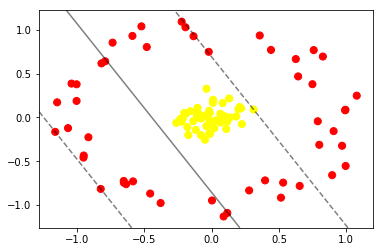

In [12]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)
plt.show()

On pose $r=\exp(-x^{2}-y^{2}),\mbox{ }p((x,y))=(x,y,r=\exp(-x^{2}-y^{2}))$. Alors $p:\mathbb{R}^{2}\longrightarrow \mathbb{R}^{3}$. La projection est représentée dans la figure. Dans ce nouvel espace, les 2 classes sont séparer par l'hyperplan en bleu. Cette projection rend donc les 2 ensembles linéairement séparable.

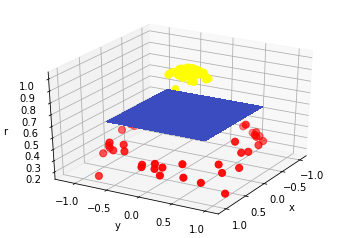

In [10]:
import numpy as np
r = np.exp(-(X ** 2).sum(1))

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter



from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    xp = np.arange(-0.8,0.8,0.1)
    #y = np.sqrt(0.6-xp**2)
    #yp = np.concatenate((-y,y))
    yp = np.arange(-0.8,0.8,0.1)
    xpp, ypp = np.meshgrid(xp, yp)
    #rr = np.repeat(0.6,32*16)
    #rr = np.sqrt(xpp**2+ypp**2)
    #rr=rr.reshape(32,16)
    point = np.array([0,0,0.6])
    normal = np.array([0,0,1])
    d = -point.dot(normal)
    z = (-normal[0] * xpp - normal[1] * ypp - d) * 1. /normal[2]
    ax.plot_surface(xpp, ypp, z, cmap=cm.coolwarm,linewidth=0, antialiased=False)


plot_3D()
plt.show()
#interact(plot_3D, elev=[-90, 90], azip=(-180, 180),
 #        X=fixed(X), y=fixed(y))

Dans la figure ci-dessous, on dessine la frontiere (le cercle plein) ainsi que les marges (les cercle en tiret). Ces frontiere sont le résultat d'un SVM avec noyau RBF.

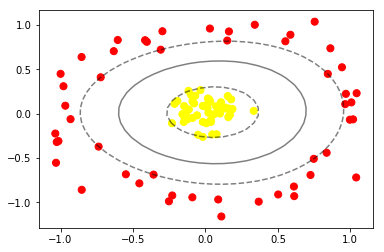

In [11]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],s=300, lw=1, facecolors='none')
plt.show()

# Généralisation au problème au cas multiclasse 
Les SVM ont été dévelopés pour traiter de problème à 2 classes. Les SVM peuvent être adapté à des problèmes multiclasses en utilisant la stratégie un contre tous (OVR=one versus rest).<br>
Stratégie un contre tous. On suppose que l'on a m classes : $\{1,\dots,m \} $<br>
* Pour chaque modalité $k \in \{1,\dots,m \}$, on apprend le classifieur $h_{k}$ de type SVM permettant de discriminer $y=k$ et $y\ne k$. 
* A partir de h_{k}, on en déduit une probabilité à postériri $f_{k}$
* A partir de ces estimations des probabilités à postériori, on affect le label estimé le plus favorable $\hat{y}=\underset{k}{\mbox{argmax}}(f_{k}(x))$

# Exemple : Application des SVM sur les données digit

On import les données digit:

In [67]:
from sklearn.datasets import load_digits
digit = load_digits()
X = digit['data']
Y = digit['target']

On divise en échantillon de test et d'apprentissage:

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

On regarde les classes:

In [45]:
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

On scale les données, la matrice des features: 

In [69]:
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()
scal.fit(X)
X_train_scale = scal.transform(X_train)
X_test_scale = scal.transform(X_test)

On appelle un objet SVM pour la classification avec un kernel linéaire:

In [74]:
from sklearn.svm import SVC
clf = SVC(C=10,kernel='linear')

On lance l'étape d'apprantissage:

In [75]:
clf.fit(X_train_scale,Y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

On fait une prédiction sur l'ensemble de test:

In [76]:
Y_pred = clf.predict(X_test_scale)
Y_pred[0:10]

array([8, 0, 5, 9, 3, 2, 1, 1, 2, 5])

On fait une matrice de confusion: 

In [77]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 29,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 26,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 53,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  0,  1],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 27,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 39]])

### Exemple de SVM pour la régression : prédire la température critique de supraconducteur
Les données proviennent du site https://archive.ics.uci.edu/ml/machine-learning-databases/00464/

On import les données:

In [16]:
import pandas as pd
supracond = pd.read_csv("/home/fabien/Bureau/donnees projet/superconduct/train.csv")

In [37]:
list_feature = list(supracond)
target = ['critical_temp']
list_feature = [o for o in list_feature if o not in ['critical_temp','number_of_elements']]
ADUM = supracond[['number_of_elements']].astype(str)
ADUMBIS = pd.get_dummies(ADUM)
X =  supracond[list_feature]
X = pd.concat([ADUMBIS,X],axis=1)
Y = supracond[target]

On divise en échantillon d'apprentissage et de test:

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20)

On scale les données:

In [40]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(X_train)
X_train_scale = scale.transform(X_train)
X_test_scale = scale.transform(X_test)

On appelle l'objet SVR:

In [56]:
from sklearn.svm import SVR
clf = SVR(C=2900,kernel='rbf',epsilon=3,gamma=0.09)

Etape d'apprentissage:

In [57]:
clf.fit(X_train_scale,Y_train.values.ravel())

SVR(C=2900, cache_size=200, coef0=0.0, degree=3, epsilon=3, gamma=0.09,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

On regarde le score r2: 

In [62]:
from sklearn.metrics import r2_score
Y_pred = clf.predict(X_test_scale)
r2_score(Y_test,Y_pred)

0.90189163791198024